In [1]:
rm(list=ls())

# Question1 
- construct an appropriate-size classification tree for the vehicle data 

In [134]:
# library(rpart)
# library(miceadds )
# library(rpart.plot)
# library(caret)
# library(rattle)


In [3]:
load.Rdata("vehicle.RData","vehicle")

In [4]:
head(vehicle,1)

Comp,Circ,Dcirc,RR,PrAxisAR,MaxLAR,ScatterR,Elong,PrAxisRect,MaxLRect,SvarMajAxis,SvarMinAxis,SradGyration,SkewMajAxis,SkewMinAxis,KurtMinAxis,KurtMajAxis,Hratio,classdigit,class
109,52,104,199,60,12,215,31,24,162,220,691,212,67,11,7,189,199,2,saab


In [5]:
dim(vehicle)

[1] 564  20

In [6]:
str(vehicle)

'data.frame':	564 obs. of  20 variables:
 $ Comp        : int  109 91 108 90 83 96 82 91 89 79 ...
 $ Circ        : int  52 46 54 44 40 41 45 42 42 40 ...
 $ Dcirc       : int  104 75 103 72 59 69 66 84 66 80 ...
 $ RR          : int  199 185 212 157 116 153 252 209 125 133 ...
 $ PrAxisAR    : int  60 75 65 64 53 56 126 75 53 55 ...
 $ MaxLAR      : int  12 7 11 8 7 7 52 6 7 7 ...
 $ ScatterR    : int  215 154 208 137 132 141 148 171 131 147 ...
 $ Elong       : int  31 42 32 48 52 47 45 38 51 47 ...
 $ PrAxisRect  : int  24 19 24 18 18 18 19 20 18 19 ...
 $ MaxLRect    : int  162 147 162 144 137 141 144 138 144 135 ...
 $ SvarMajAxis : int  220 178 228 159 145 162 237 189 162 172 ...
 $ SvarMinAxis : int  691 362 648 283 250 297 326 446 254 311 ...
 $ SradGyration: int  212 192 240 171 157 169 185 161 162 144 ...
 $ SkewMajAxis : int  67 72 71 65 84 61 119 69 73 76 ...
 $ SkewMinAxis : int  11 8 9 9 12 11 1 3 10 8 ...
 $ KurtMinAxis : int  7 8 0 4 6 8 1 12 17 30 ...
 $ KurtMajAxis : 

- "class" and "classdigit" are redundant, let's drop "classdigit"

In [7]:
vehicle <- vehicle[,-19]

In [8]:
names(vehicle)
dim(vehicle)

[1] "Comp"         "Circ"         "Dcirc"        "RR"           "PrAxisAR"    
 [6] "MaxLAR"       "ScatterR"     "Elong"        "PrAxisRect"   "MaxLRect"    
[11] "SvarMajAxis"  "SvarMinAxis"  "SradGyration" "SkewMajAxis"  "SkewMinAxis" 
[16] "KurtMinAxis"  "KurtMajAxis"  "Hratio"       "class"

[1] 564  19

### Fit regression tree

In [9]:
model_control <- rpart.control(minsplit=10,xval=10,cp=0)

In [10]:
fit_vehicle <- rpart(class~.,data=vehicle,method="class",control=model_control)

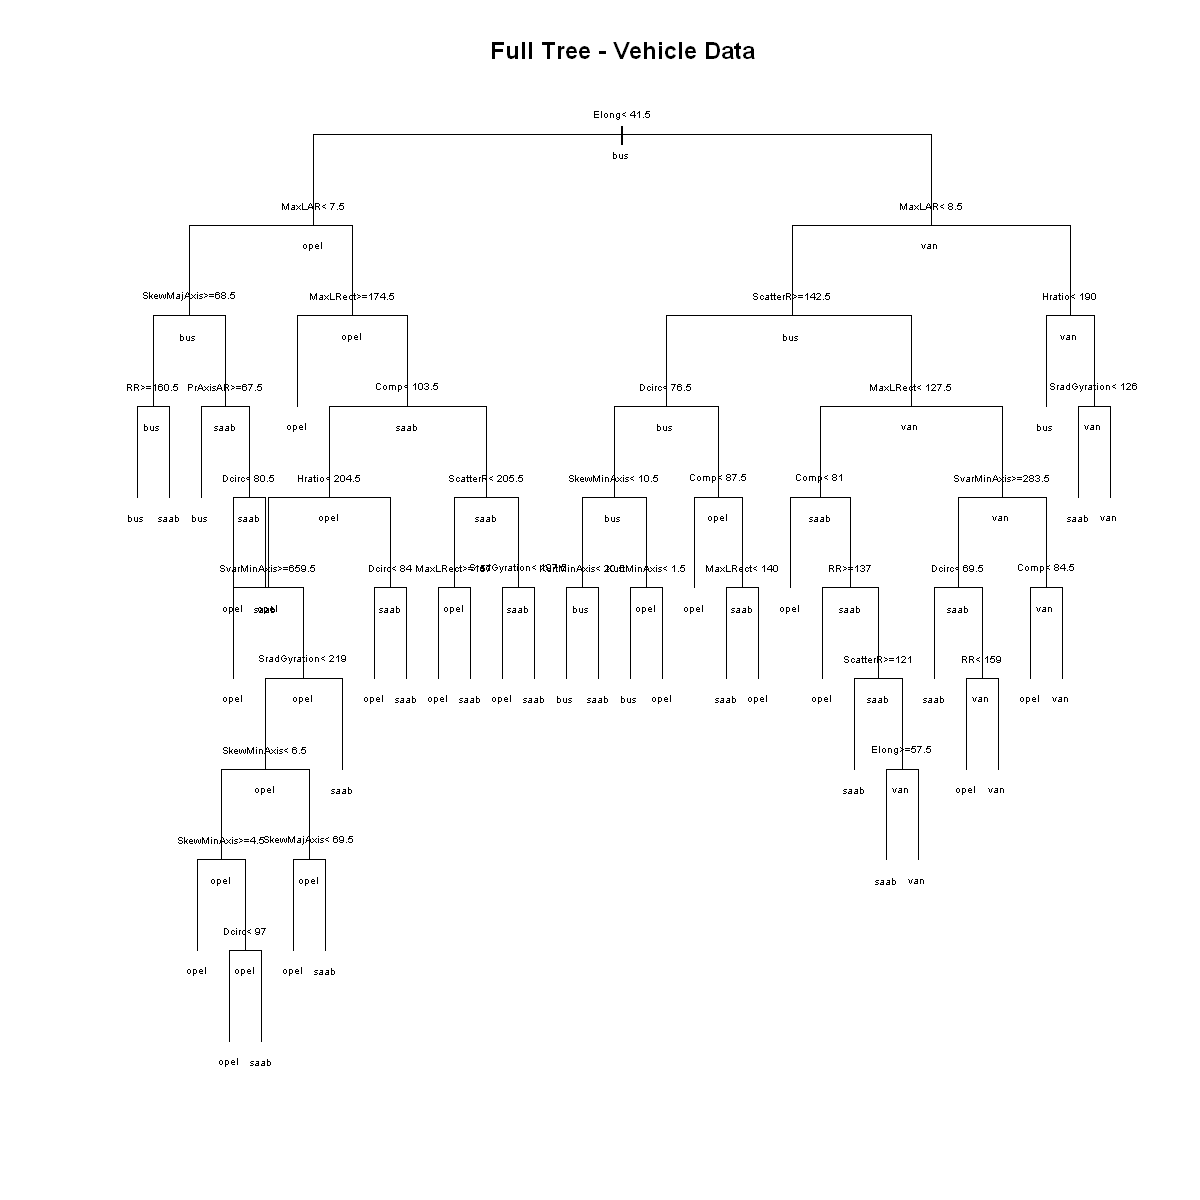

In [11]:
options(repr.plot.width=10, repr.plot.height=10)

plot(fit_vehicle,uniform=T,compress=T,main="Full Tree - Vehicle Data")
text(fit_vehicle,cex=0.5,all=T)

- we can see that all classes were represented at the terminal nodes 

### Further information on the tree

In [12]:
cp_table = data.frame(fit_vehicle$cptable)

In [13]:
var_importance <- fit_vehicle$variable.importance

In [14]:
names(var_importance)

[1] "ScatterR"     "SvarMinAxis"  "Elong"        "SvarMajAxis"  "PrAxisRect"  
 [6] "MaxLAR"       "Dcirc"        "MaxLRect"     "RR"           "SkewMajAxis" 
[11] "Hratio"       "SradGyration" "Circ"         "Comp"         "KurtMajAxis" 
[16] "KurtMinAxis"  "SkewMinAxis"  "PrAxisAR"

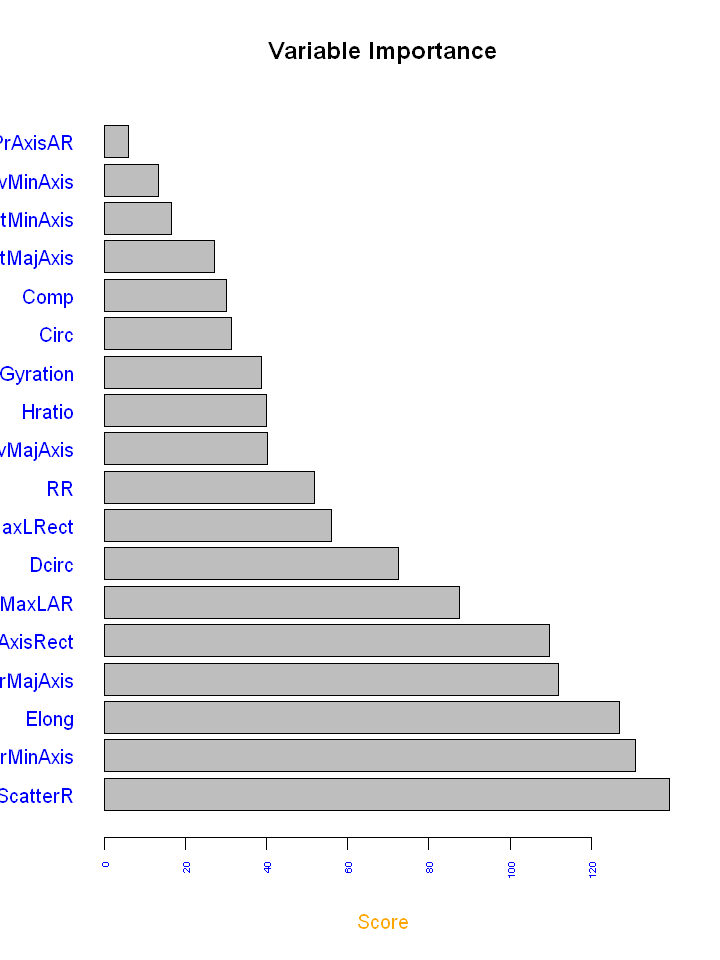

In [15]:
options(repr.plot.width=6, repr.plot.height=8)

barplot(var_importance, 
        main="Variable Importance",
        xlab="Score",
        horiz=T,
        las=2,
        col.lab = "orange",
        col.axis= "blue",
        cex.axis=0.5)

- Here we can visualize the importance of each variable in our decision tree, with "scatterR" being the most important, and "PrAxisAR" being the least important. 
- It is also important to note that, the importance of variables in the decision tree is different than that on the barchart, which is resonable, not all variables will be used, but the unused variables will be considered in the decision making 

#### Making prediction using the full tree (not assinged) 

In [16]:
fit_vehicle_pred <- predict(fit_vehicle, vehicle, type = "class")


In [17]:
full_cm <- confusionMatrix(data = fit_vehicle_pred, reference = vehicle$class)

In [18]:
full_cm$table

          Reference
Prediction bus opel saab van
      bus  144    2    4   0
      opel   1  117   20   8
      saab   2   20  109   2
      van    1    1    3 130

### Pruning
- prune the tree using the cross validation error

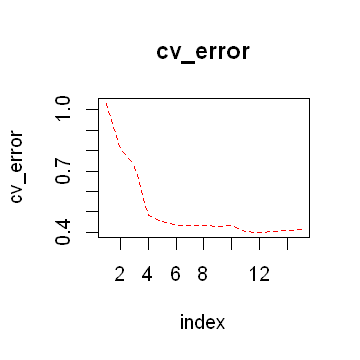

In [19]:
options(repr.plot.width=3, repr.plot.height=3)
plot(cp_table$xerror, col="red",type = "l",lty=2,main="cv_error",xlab="index",ylab="cv_error")

- 5th split (index at 5) has a resonal cross validation error, which we can use to prune the decision tree

In [20]:
pruned_vehicle <- prune(fit_vehicle,cp=cp_table[5,1])

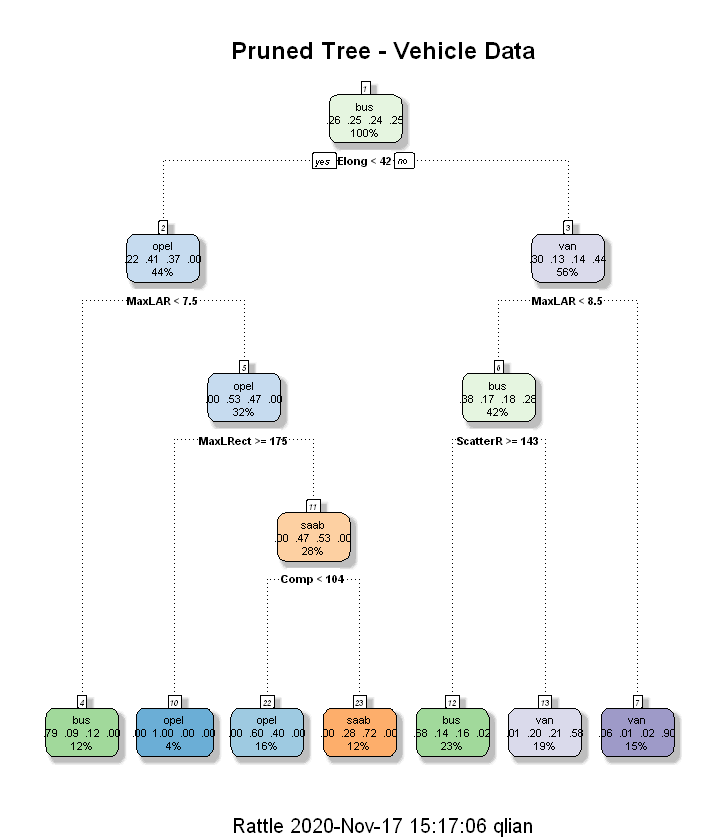

In [21]:
options(repr.plot.width=6, repr.plot.height=7)

fancyRpartPlot(pruned_vehicle,main="Pruned Tree - Vehicle Data")

#### Making predictions using the pruned tree

In [22]:
pruned_pred <- predict(pruned_vehicle, vehicle, type = "class")

In [23]:
pruned_cm <- confusionMatrix(data = pruned_pred, reference = vehicle$class)

In [24]:
pruned_cm$table

          Reference
Prediction bus opel saab van
      bus  142   24   28   3
      opel   0   75   36   0
      saab   0   19   48   0
      van    6   22   24 137

### Obtain accuracies for the full tree and the pruned tree

In [25]:
pruned_cm$overall['Accuracy']

Accuracy 
0.712766

In [26]:
full_cm$overall['Accuracy']

Accuracy 
0.8865248

- the prune tree has ~17% lower prediction accuracy than the full tree, we might have over-pruned here. 

# Question2
- 2) For the prostate data, carry out a best
subset regression analysis, as in Table 3.3 (third column from the left).
Compute the AIC, BIC, five-and tenfold cross-validation, and bootstrap
.632 estimates of prediction error. 


In [135]:
# library(faraway)

## Explore the dataset

In [30]:
head(prostate)

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


In [31]:
dim(prostate)

[1] 97  9

In [32]:
names(prostate)

[1] "lcavol"  "lweight" "age"     "lbph"    "svi"     "lcp"     "gleason"
[8] "pgg45"   "lpsa"

In [33]:
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

In [34]:
str(prostate)

'data.frame':	97 obs. of  9 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...


### Insample methods: AIC and BIC
- in-sample methods utilize the entire dataset

In [136]:
# library(leaps)

In [36]:
fit_prostate <- regsubsets(lpsa~.,data=prostate,nvmax=8,method="exhaustive")

In [37]:
prostate_sum <- summary(fit_prostate)

In [38]:
prostate_sum$outmat

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
1 ( 1 ),*,,,,,,,
2 ( 1 ),*,*,,,,,,
3 ( 1 ),*,*,,,*,,,
4 ( 1 ),*,*,,*,*,,,
5 ( 1 ),*,*,*,*,*,,,
6 ( 1 ),*,*,*,*,*,,,*
7 ( 1 ),*,*,*,*,*,*,,*
8 ( 1 ),*,*,*,*,*,*,*,*


In [39]:
names(prostate_sum)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

### AIC and BIC
- leaps AIC = mallow's cp, let's extract that.

In [40]:
AIC_prostate <- prostate_sum$cp

In [41]:
BIC_prostate <- prostate_sum$bic

In [42]:
AIC_min = which.min(AIC_prostate)

In [43]:
AIC_min

[1] 4

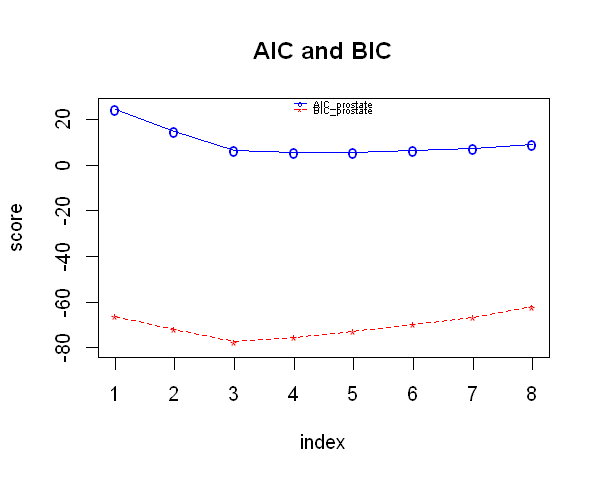

In [44]:
options(repr.plot.width=5, repr.plot.height=4)
index = (1:8)
plot(index, AIC_prostate, type="o", col="blue", pch="o", lty=1, ylim=c(-80,25),ylab="score",main="AIC and BIC" )
points(index, BIC_prostate, col="red", pch="*")
lines(index, BIC_prostate, col="red",lty=2)
legend("top",legend=c("AIC_prostate","BIC_prostate"), bty="n",col=c("blue","red"),pch=c("o","*"),lty=c(1,2), ncol=1,cex=0.5)

In [45]:
AIC_min = which.min(AIC_prostate)
BIC_min = which.min(BIC_prostate)
cat('model with lowest AIC: ',AIC_min,"\nmodel with lowest BIC: ",BIC_min)

model with lowest AIC:  4 
model with lowest BIC:  3

- We can extract the models with minium AIC and BIC. The model with  minimum AIC is the 4-variable, however by looking at the whole profile of AIC and BIC (the graph above), we can see that 3 model would've been the optimal choice, since 4-variable does not reduce the AIC score drastically. 
- conclusion: 3-variable model is the optimal model determined by AIC and BIC!

### 5-fold Cross Validation

In [46]:
set.seed(8999)
fold5=sample(rep(1:5, length=nrow(prostate)))


In [47]:
temp1=matrix(NA, 5, 8) #5 folds, 8 variables

for (k in 1:5){
    exh_fit=regsubsets(lpsa~., data=prostate[fold5!=k,], nvmax=8, method="exhaustive")
    test_matrix = model.matrix(lpsa~.,data=prostate[fold5==k,])
  for (i in 1:8){
    coefi = coef(exh_fit,id=i)
    pred = test_matrix[,names(coefi)] %*% coefi
    temp1[k,i]=mean((prostate$lpsa[fold5==k]-pred)^2)
  }
}


In [48]:
cv5_errors=rep(NA, 8)
for (i in 1:8){
    cv5_errors[i] = mean(temp1[,i])
}

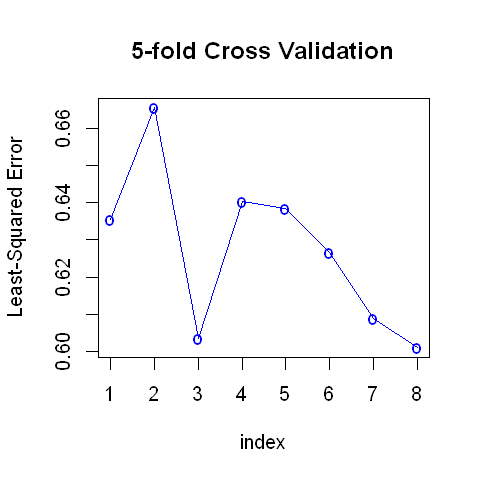

In [49]:
options(repr.plot.width=4, repr.plot.height=4)

plot(index, cv5_errors, type="o", col="blue", pch="o", lty=1,ylab="Least-Squared Error",main="5-fold Cross Validation" )


In [50]:
CV5_min = which.min(cv5_errors)
cat('model with lowest 5-fold CV error: ',CV5_min)

model with lowest 5-fold CV error:  8

- We can extract the models with 5-fold cross validation error which is the 8 variable model, however by looking at the full profile of our 5-fold cross validation result, we see that 3 variable model would have done a similar job, since the additional variable does not drastically reduce the error rate
- conclusion: optimal model from 5-fold cross validation is the 3-variable model.

### 10-fold Cross Validation

In [51]:
fold10=sample(rep(1:10, length=nrow(prostate)))


In [52]:
temp2=matrix(NA, 10, 8) #5 folds, 8 variables

for (k in 1:10){
    exh_fit=regsubsets(lpsa~., data=prostate[fold10!=k,], nvmax=8, method="exhaustive")
    test_matrix = model.matrix(lpsa~.,data=prostate[fold10==k,])
  for (i in 1:8){
    coefi = coef(exh_fit,id=i)
    pred = test_matrix[,names(coefi)] %*% coefi
    temp2[k,i]=mean((prostate$lpsa[fold10==k]-pred)^2)
  }
}


In [53]:
cv10_errors=rep(NA, 8)
for (i in 1:8){
    cv10_errors[i] = mean(temp2[,i])
}

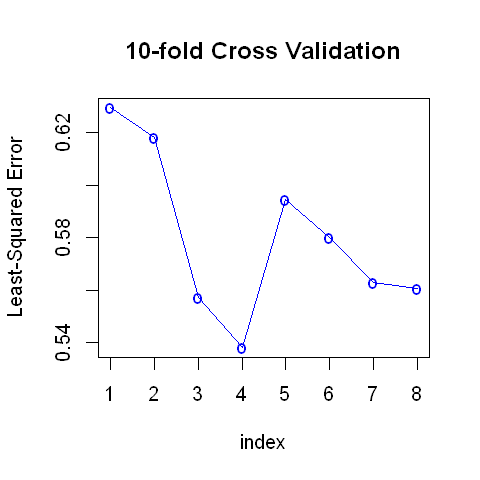

In [54]:
plot(index, cv10_errors, type="o", col="blue", pch="o", lty=1,ylab="Least-Squared Error",main="10-fold Cross Validation" )


In [55]:
CV10_min = which.min(cv10_errors)
cat('model with lowest 10-fold CV error: ',CV10_min)

model with lowest 10-fold CV error:  4

- conclusion: optimal model from 10-fold cross validation is the 4-variable model.

###  bootstrap .632 estimates

In [137]:
# library(bootstrap)
# library(boot)

In [57]:
X <- prostate[,-9]
Y <- prostate$lpsa

In [58]:
# create the function that feeds into "bootpred"

#fit the model 
theta.fit <- function(X,Y){
    lsfit(X,Y) #works like lm
}

#
theta.predict <-function(fit,X){
    cbind(1,X) %*% fit$coef
}

sq.error <- function(Y,Yhat){
    (Y-Yhat)^2
}

In [59]:
select = prostate_sum$outmat
p632_est <- rep(NA,8)
for (i in 1:8){
	# Pull out the model
	temp <- which(select[i,] == "*")

	res <- bootpred(X[,temp], Y,
                    nboot = 50,
                    theta.fit = theta.fit,
                    theta.predict = theta.predict,
                    err.meas = sq.error) 
	p632_est[i] <- res[[3]]
}

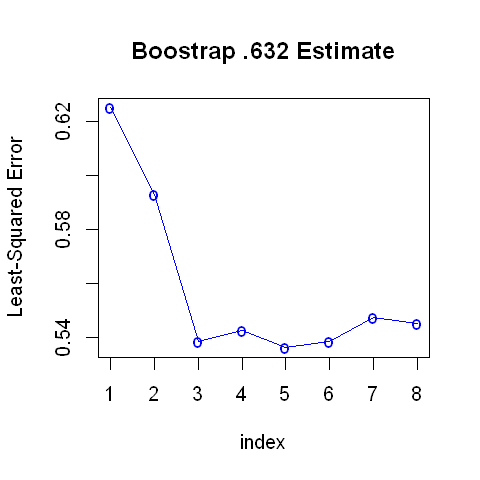

In [60]:
plot(index, p632_est, type="o", col="blue", pch="o", lty=1,ylab="Least-Squared Error",main="Boostrap .632 Estimate" )


In [61]:
boot_min = which.min(p632_est)
cat('model with lowest Boostrap .632 estimate error: ',boot_min)

model with lowest Boostrap .632 estimate error:  5

- We can extract the models with minimum .632 estimate error which is the 5-variable model, however by looking at the graph above, 3-variable would perform similarly as 5-variable model 
- conclusion: 3-variable model is the optimal model determined boostrap 0.632 estimate method

### Conclusion

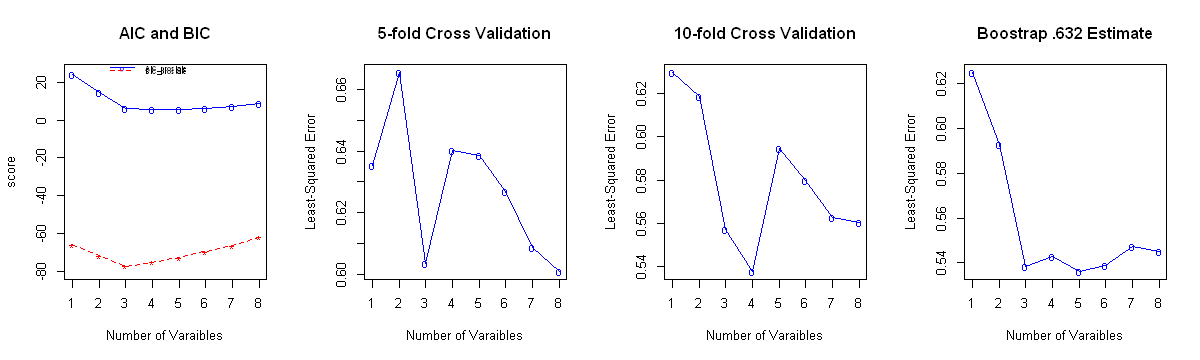

In [62]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow=c(1,4))
index = (1:8)
plot(index, AIC_prostate, type="o", col="blue", pch="o", lty=1, ylim=c(-80,25),xlab="Number of Varaibles",ylab="score",main="AIC and BIC" )
points(index, BIC_prostate, col="red", pch="*")
lines(index, BIC_prostate, col="red",lty=2)
legend("top",legend=c("AIC_prostate","BIC_prostate"), bty="n",col=c("blue","red"),pch=c("o","*"),lty=c(1,2), ncol=1,cex=0.5)
plot(index, cv5_errors, type="o", col="blue", pch="o", lty=1,xlab="Number of Varaibles",ylab="Least-Squared Error",main="5-fold Cross Validation" )
plot(index, cv10_errors, type="o", col="blue", pch="o", lty=1,xlab="Number of Varaibles",ylab="Least-Squared Error",main="10-fold Cross Validation" )
plot(index, p632_est, type="o", col="blue", pch="o", lty=1,xlab="Number of Varaibles",ylab="Least-Squared Error",main="Boostrap .632 Estimate" )


In [63]:
method <- c("AIC","BIC","5-Fold","10-Fold",".632")
variables <- c(3,3,3,4,3)

In [64]:
rbind(method,variables)

method,AIC,BIC,5-Fold,10-Fold,.632
variables,3,3,3,4,3


- in conlusion, all methods yielded 3-variable as the most optimal model (obtained from observing the graph, not by taking the minimum performance metrics), except for 10-fold cross validation method, which yielded 4-variable model as the optimal model. We can say that the 3-variable is the most optimal in terms of accuracy and computationally feasibility for future prediction algorithms 

# Question3

- Access the wine data from the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/wine). These data are the results of a
chemical analysis of 178 wines grown over the decade 1970-1979 in the same
region of Italy, but derived from three different cultivars (Barolo, Grignolino,
Barbera). The Babera wines were predominately from a period that was much
later than that of the Barolo and Grignolino wines. The analysis determined the
quantities MalicAcid, Ash, AlcAsh, Mg, Phenols, Proa, Color, Hue, OD, and
Proline. There are 50 Barolo wines, 71 Grignolino wines, and 48 Barbera wines.
Construct the appropriate-size classification tree for this dataset. Apply an
ensemble technique (e.g., random forests or boosting). Compare the performance.
- Construct an LDA model, and compare your performance to part (A). 

In [65]:
head(wine)

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [66]:
str(wine)

'data.frame':	178 obs. of  14 variables:
 $ Type           : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol        : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash            : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity     : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium      : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Phenols        : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids     : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoids  : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins: num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color          : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue            : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ Dilution       : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 

In [67]:
dim(wine)

[1] 178  14

In [68]:
unique(wine$Type)

[1] 1 2 3
Levels: 1 2 3

### Train Test Split

In [69]:
set.seed(384902)

In [70]:
inTrain <- createDataPartition(y = wine$Type,
                               p = 0.7,
                               list = FALSE)
train_wine <-wine[inTrain,]
test_wine <-wine[-inTrain,]

- We will use 4 methods: single classification tree, random forest, bagging, and linear discriminant analysis to predict the Type of wine and compare the performances by doing the following:
    - fit the model 
    - obtain the confusion matrices
    - compute the training and test accuracies 

### Construct Classification Tree

In [71]:
model_control <- rpart.control(minsplit=5,xval=10,cp=0)

In [72]:
fit_wine <- rpart(Type~.,data=train_wine,method="class",control=model_control)

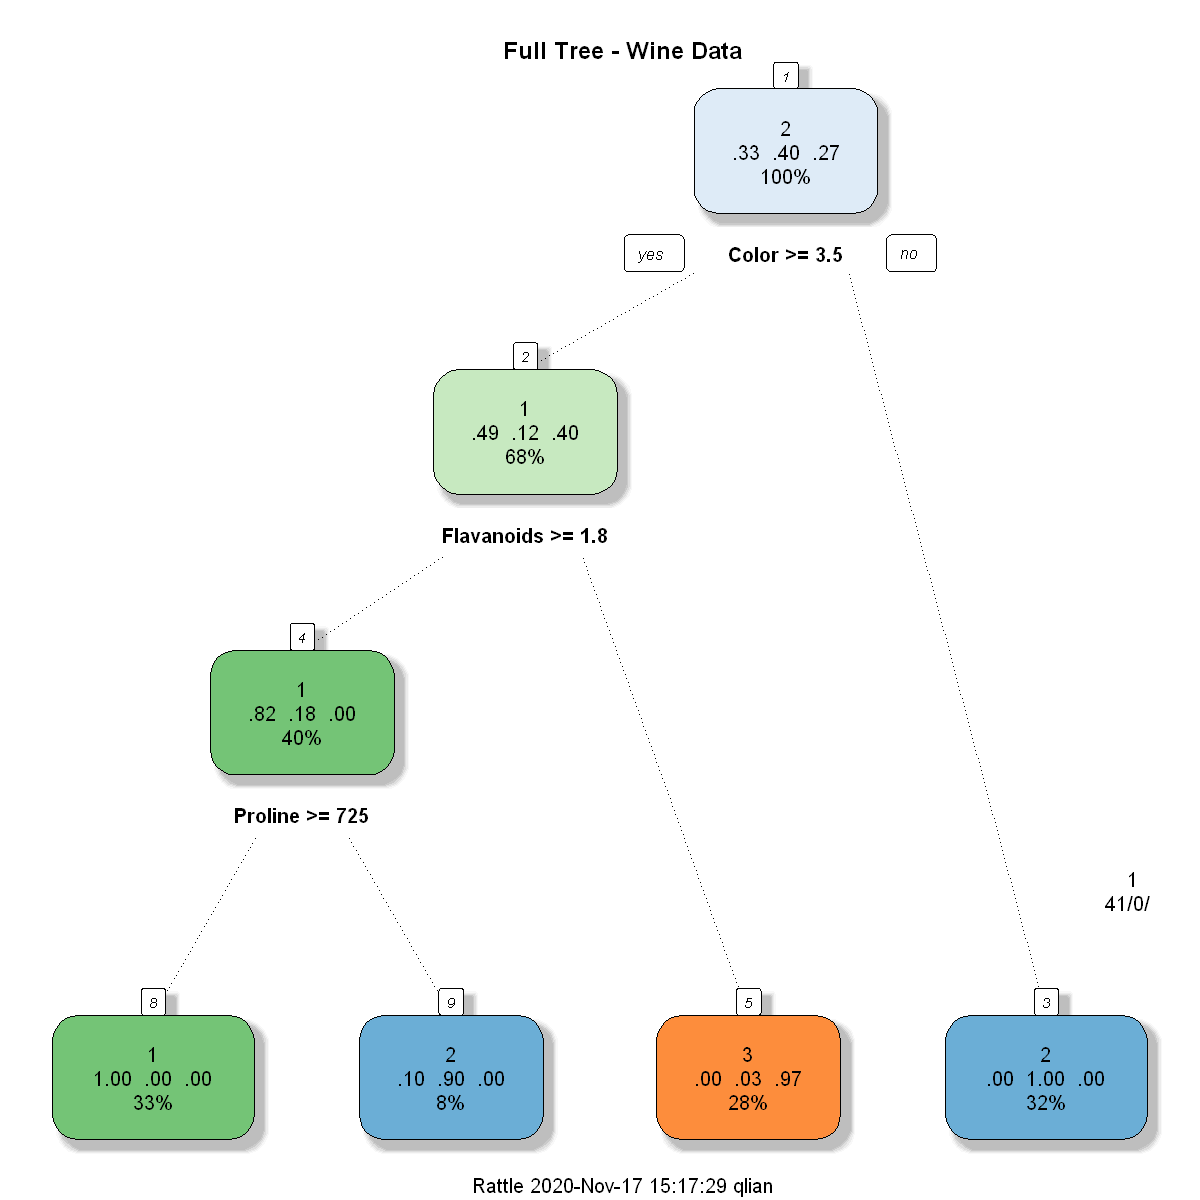

In [73]:
options(repr.plot.width=10, repr.plot.height=10)

fancyRpartPlot(fit_wine,branch=0.22,compress=T,main="Full Tree - Wine Data")
text(fit_wine,cex=1,use.n=T,all=T)

### Making Prediction

In [74]:
wine_pred_train <- predict(fit_wine, train_wine,type="class")
wine_pred_test <- predict(fit_wine, test_wine,type="class")


In [75]:
wine_train_cm <- confusionMatrix(data = wine_pred_train, reference = train_wine$Type)
wine_test_cm <- confusionMatrix(data = wine_pred_test, reference = test_wine$Type)


In [76]:
wine_train_cm$table
wine_test_cm$table

          Reference
Prediction  1  2  3
         1 41  0  0
         2  1 49  0
         3  0  1 34

          Reference
Prediction  1  2  3
         1 17  0  0
         2  0 18  0
         3  0  3 14

In [77]:
tree_train_acc <- wine_train_cm$overall['Accuracy']
tree_test_acc <- wine_test_cm$overall['Accuracy']
cat("Training Accuracy for classification tree:",tree_train_acc,
   "\nTesting Accuracy for classification tree:",tree_test_acc)

Training Accuracy for classification tree: 0.984127 
Testing Accuracy for classification tree: 0.9423077

### Random Forest

In [138]:
# library(randomForest)

In [79]:
wine_rf_fit <- randomForest(Type~.,data=train_wine,n.tree=500)

In [80]:
names(wine_rf_fit)

[1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"

In [81]:
importance(wine_rf_fit)

,MeanDecreaseGini
Alcohol,11.2756023
Malic,2.8526570
Ash,0.6757757
Alcalinity,2.4959445
Magnesium,2.6193796
Phenols,4.5425851
Flavanoids,12.4191601
Nonflavanoids,1.4105023
Proanthocyanins,1.5644832
Color,13.6088627


In [82]:
wine_pred_train <- predict(wine_rf_fit,newdata=train_wine,type="response")
wine_pred_test <- predict(wine_rf_fit,newdata=test_wine,type="response")


In [83]:
wine_train_cm <- confusionMatrix(data = wine_pred_train, reference = train_wine$Type)
wine_test_cm <- confusionMatrix(data = wine_pred_test, reference = test_wine$Type)


In [84]:
wine_train_cm$table
wine_test_cm$table

          Reference
Prediction  1  2  3
         1 42  0  0
         2  0 50  0
         3  0  0 34

          Reference
Prediction  1  2  3
         1 17  1  0
         2  0 19  0
         3  0  1 14

In [85]:
rf_train_acc <- wine_train_cm$overall['Accuracy']
rf_test_acc <- wine_test_cm$overall['Accuracy']
cat("Training Accuracy for Random Forest:",rf_train_acc,
   "\nTesting Accuracy for Random Forest:",rf_test_acc)

Training Accuracy for Random Forest: 1 
Testing Accuracy for Random Forest: 0.9615385

### Bagging

In [86]:
dim(wine)

[1] 178  14

In [87]:
wine_bag_fit <- randomForest(Type~.,data=train_wine,n.tree=500,mtry=13)

In [88]:
importance(wine_bag_fit)

,MeanDecreaseGini
Alcohol,10.0863197
Malic,1.0941825
Ash,0.2392678
Alcalinity,0.3481463
Magnesium,0.8539957
Phenols,0.4283358
Flavanoids,14.2704467
Nonflavanoids,0.1220859
Proanthocyanins,0.3338512
Color,20.4398795


In [89]:
wine_pred_train <- predict(wine_bag_fit,newdata=train_wine,type="response")
wine_pred_test <- predict(wine_bag_fit,newdata=test_wine,type="response")


In [90]:
wine_train_cm <- confusionMatrix(data = wine_pred_train, reference = train_wine$Type)
wine_test_cm <- confusionMatrix(data = wine_pred_test, reference = test_wine$Type)


In [91]:
wine_train_cm$table
wine_test_cm$table

          Reference
Prediction  1  2  3
         1 42  0  0
         2  0 50  0
         3  0  0 34

          Reference
Prediction  1  2  3
         1 17  1  0
         2  0 18  0
         3  0  2 14

In [92]:
bag_train_acc <- wine_train_cm$overall['Accuracy']
bag_test_acc <- wine_test_cm$overall['Accuracy']
cat("Training Accuracy for Bagging:",bag_train_acc,
   "\nTesting Accuracy for Bagging:",bag_test_acc)

Training Accuracy for Bagging: 1 
Testing Accuracy for Bagging: 0.9423077

### LDA

In [139]:
# library("MASS")

In [94]:
wine_lda_fit = lda(Type~.,data=train_wine)

In [95]:
wine_pred_train <-predict(wine_lda_fit,newdata=train_wine)
wine_pred_test <-predict(wine_lda_fit,newdata=test_wine)


In [96]:
wine_pred_train <-wine_pred_train$class
wine_pred_test <- wine_pred_test$class

In [97]:
wine_train_cm <- confusionMatrix(data = wine_pred_train, reference = train_wine$Type)
wine_test_cm <- confusionMatrix(data = wine_pred_test, reference = test_wine$Type)

In [98]:
wine_train_cm$table
wine_test_cm$table

          Reference
Prediction  1  2  3
         1 42  0  0
         2  0 50  0
         3  0  0 34

          Reference
Prediction  1  2  3
         1 17  1  0
         2  0 19  0
         3  0  1 14

In [99]:
lda_train_acc <- wine_train_cm$overall['Accuracy']
lda_test_acc <- wine_test_cm$overall['Accuracy']
cat("Training Accuracy for LDA:",lda_train_acc,
   "\nTesting Accuracy for LDA:",lda_test_acc)

Training Accuracy for LDA: 1 
Testing Accuracy for LDA: 0.9615385

In [100]:
training_accuracy<-rbind(tree_train_acc,rf_train_acc,bag_train_acc,lda_train_acc)
testing_accuracy<-rbind(tree_test_acc,rf_test_acc,bag_test_acc,lda_test_acc)

In [101]:
training_accuracy
testing_accuracy

,Accuracy
tree_train_acc,0.984127
rf_train_acc,1.000000
bag_train_acc,1.000000
lda_train_acc,1.000000


,Accuracy
tree_test_acc,0.9423077
rf_test_acc,0.9615385
bag_test_acc,0.9423077
lda_test_acc,0.9615385


- training accuracy: we can see that random forest, bagging and LDA have 100 accuracy, single tree has ~98.4%.
- testing accuracy: random forest and lda have the highest accuracy - ~96.2%, followed by bagging and single tree which is ~94.2%
- In conclusion we can can say that random forest and LDA out performed the other two algorithms, and bagging outperforms the single tree algorithm.

# Extra Credit
- 4) The “covertype” data (ub learns) was obtained from the US Forest Service and
are concerned with seven different types of forest cover. The data can be found
on UB learns. There are 581,012 observations (each a 30x30 meter cell) on 54
input variables (10 quantitative variables, 4 binary wilderness areas, and 40 binary
soil type variables). Divide these data randomly into a training set and a test set.
Use any of the methods we discussed to develop a model that predicts the forest
cover type. Report the training and test error rates. 

In [102]:
load.Rdata("covertype.RData","covertype")

## EDA

In [103]:
dim(covertype)

[1] 581012     55

#### Check missing data

In [104]:
sum(is.na(covertype))

[1] 0

- no missing data, let's proceed

#### Organize the data

In [105]:
names(covertype)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26" "V27" "V28" "V29" "V30" "V31" "V32" "V33" "V34" "V35" "V36"
[37] "V37" "V38" "V39" "V40" "V41" "V42" "V43" "V44" "V45" "V46" "V47" "V48"
[49] "V49" "V50" "V51" "V52" "V53" "V54" "V55"

In [106]:
head(covertype$V40)

[1] 0 0 0 0 0 0

- all the variables have generic names V1-V55, we should name them correctly

In [107]:
## 10 quantitative variables
names <- c("Elevation","Aspect","Slope","HorDistToHydro","VertDistToHydro",
           "HorDistRoad","Hillshade09","Hillshade12","Hillshade15",
           "HorDistFire")

## 4 binary wilderness areas
names <- c(names,"WA_RWA","WA_NWA","WA_CPWA","WA_CLPWA")

## 40 binary soil type variable
names <- c(names,sprintf("ST%02d",1:40))

## response varible - forest cover type
names <- c(names,"Class")


In [108]:
names(covertype) <- names

In [109]:
names(covertype)

[1] "Elevation"       "Aspect"          "Slope"           "HorDistToHydro" 
 [5] "VertDistToHydro" "HorDistRoad"     "Hillshade09"     "Hillshade12"    
 [9] "Hillshade15"     "HorDistFire"     "WA_RWA"          "WA_NWA"         
[13] "WA_CPWA"         "WA_CLPWA"        "ST01"            "ST02"           
[17] "ST03"            "ST04"            "ST05"            "ST06"           
[21] "ST07"            "ST08"            "ST09"            "ST10"           
[25] "ST11"            "ST12"            "ST13"            "ST14"           
[29] "ST15"            "ST16"            "ST17"            "ST18"           
[33] "ST19"            "ST20"            "ST21"            "ST22"           
[37] "ST23"            "ST24"            "ST25"            "ST26"           
[41] "ST27"            "ST28"            "ST29"            "ST30"           
[45] "ST31"            "ST32"            "ST33"            "ST34"           
[49] "ST35"            "ST36"            "ST37"            "ST38"           
[53] "ST39"            "ST40"            "Class"

#### Covert the 4 binary wilderness data intoa single 4-level cateogorical variable

In [110]:
wilderness <- c("WA_RWA","WA_NWA","WA_CPWA","WA_CLPWA")
index <- apply(covertype[,wilderness], 1, function(x) which(x == 1))
factorize <- factor(index,labels = wilderness)
covertype$wildA <- factorize
covertype[wilderness] <-list(NULL)

In [111]:
unique(covertype$wildA)

[1] WA_RWA   WA_CPWA  WA_CLPWA WA_NWA  
Levels: WA_RWA WA_NWA WA_CPWA WA_CLPWA

#### Covert the 40 binary soil type data into a single 40-level cateogorical variable

In [112]:
soils <- sprintf("ST%02d",1:40)
index <- apply(covertype[,soils], 1, function(x) which(x == 1))
factorize <- factor(index,labels = soils)
covertype$soilType <- factorize
covertype[soils] <-list(NULL)

In [113]:
names(covertype)

[1] "Elevation"       "Aspect"          "Slope"           "HorDistToHydro" 
 [5] "VertDistToHydro" "HorDistRoad"     "Hillshade09"     "Hillshade12"    
 [9] "Hillshade15"     "HorDistFire"     "Class"           "wildA"          
[13] "soilType"

In [114]:
unique(covertype$soilType)

[1] ST29 ST12 ST30 ST18 ST16 ST20 ST24 ST23 ST40 ST19 ST08 ST22 ST39 ST09 ST38
[16] ST33 ST31 ST32 ST11 ST10 ST05 ST28 ST04 ST01 ST13 ST02 ST17 ST03 ST34 ST06
[31] ST14 ST37 ST35 ST36 ST21 ST26 ST27 ST25 ST07 ST15
40 Levels: ST01 ST02 ST03 ST04 ST05 ST06 ST07 ST08 ST09 ST10 ST11 ST12 ... ST40

In [115]:
dim(covertype)

[1] 581012     13

#### Convert class to factor variable

In [116]:
covertype$Class <- as.factor(covertype$Class)
levels(covertype$Class) <- c("Spruce/Fir", "Lodgepole Pine",
                           "Ponderosa Pine","Cottonwood/Willow","Aspen",
                           "Douglas-fir","Krummholz")

In [117]:
str(covertype)

'data.frame':	581012 obs. of  13 variables:
 $ Elevation      : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect         : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope          : int  3 2 9 18 2 6 7 4 9 10 ...
 $ HorDistToHydro : int  258 212 268 242 153 300 270 234 240 247 ...
 $ VertDistToHydro: int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ HorDistRoad    : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ Hillshade09    : int  221 220 234 238 220 230 222 222 223 228 ...
 $ Hillshade12    : int  232 235 238 238 234 237 225 230 221 219 ...
 $ Hillshade15    : int  148 151 135 122 150 140 138 144 133 124 ...
 $ HorDistFire    : int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Class          : Factor w/ 7 levels "Spruce/Fir","Lodgepole Pine",..: 5 5 2 2 5 2 5 5 5 5 ...
 $ wildA          : Factor w/ 4 levels "WA_RWA","WA_NWA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ soilType       : Factor w/ 40 levels "ST01","ST02",..: 29 29 12 30 29 29 29 29 29 29 ...


In [118]:
summary(covertype$Class)

Spruce/Fir    Lodgepole Pine    Ponderosa Pine Cottonwood/Willow 
           211840            283301             35754              2747 
            Aspen       Douglas-fir         Krummholz 
             9493             17367             20510

#### The dataset is too large for my computational power, we will reduce the dataset by 1/10, 1/10 of each class will be taken randomly

In [119]:
spruce_fir <- covertype[covertype$Class=="Spruce/Fir",]
lodgepole_pine <- covertype[covertype$Class=="Lodgepole Pine",]
ponderosa_pine <- covertype[covertype$Class=="Ponderosa Pine",]
cottonwood_willow <- covertype[covertype$Class=="Cottonwood/Willow",]
aspen <- covertype[covertype$Class=="Aspen",]
douglas_fir <- covertype[covertype$Class=="Douglas-fir",]
krummholz <- covertype[covertype$Class=="Krummholz",]

In [120]:
indi_spruce_fir <- sample(1:nrow(spruce_fir), nrow(spruce_fir)*(1/10))
indi_lodgepole_pine <- sample(1:nrow(lodgepole_pine), nrow(lodgepole_pine)*(1/10))
indi_ponderosa_pine <- sample(1:nrow(ponderosa_pine), nrow(ponderosa_pine)*(1/10))
indi_cottonwood_willow <- sample(1:nrow(cottonwood_willow), nrow(cottonwood_willow)*(1/10))
indi_aspen <- sample(1:nrow(aspen), nrow(aspen)*(1/10))
indi_douglas_fir <- sample(1:nrow(douglas_fir), nrow(douglas_fir)*(1/10))
indi_krummholz <- sample(1:nrow(krummholz), nrow(krummholz)*(1/10))


In [121]:
modified_df <- rbind.data.frame(spruce_fir[indi_spruce_fir,],
                                 lodgepole_pine[indi_lodgepole_pine,], 
                                 ponderosa_pine[indi_ponderosa_pine,],
                                 cottonwood_willow[indi_cottonwood_willow,],
                                 aspen[indi_aspen,],
                                 douglas_fir[indi_douglas_fir,],
                                 krummholz[indi_krummholz,])


In [122]:
# dim(modified_df)

#### Train test split
- There also exists some class imbalance, let's stratify our splitting

In [123]:
spruce_fir <- modified_df[modified_df$Class=="Spruce/Fir",]
lodgepole_pine <- modified_df[modified_df$Class=="Lodgepole Pine",]
ponderosa_pine <- modified_df[modified_df$Class=="Ponderosa Pine",]
cottonwood_willow <- modified_df[modified_df$Class=="Cottonwood/Willow",]
aspen <- modified_df[modified_df$Class=="Aspen",]
douglas_fir <- modified_df[modified_df$Class=="Douglas-fir",]
krummholz <- modified_df[modified_df$Class=="Krummholz",]

In [124]:
indi_spruce_fir <- sample(1:nrow(spruce_fir), nrow(spruce_fir)*(2/3))
indi_lodgepole_pine <- sample(1:nrow(lodgepole_pine), nrow(lodgepole_pine)*(2/3))
indi_ponderosa_pine <- sample(1:nrow(ponderosa_pine), nrow(ponderosa_pine)*(2/3))
indi_cottonwood_willow <- sample(1:nrow(cottonwood_willow), nrow(cottonwood_willow)*(2/3))
indi_aspen <- sample(1:nrow(aspen), nrow(aspen)*(2/3))
indi_douglas_fir <- sample(1:nrow(douglas_fir), nrow(douglas_fir)*(2/3))
indi_krummholz <- sample(1:nrow(krummholz), nrow(krummholz)*(2/3))


In [125]:
train_ct <- rbind.data.frame(spruce_fir[indi_spruce_fir,],
                                 lodgepole_pine[indi_lodgepole_pine,], 
                                 ponderosa_pine[indi_ponderosa_pine,],
                                 cottonwood_willow[indi_cottonwood_willow,],
                                 aspen[indi_aspen,],
                                 douglas_fir[indi_douglas_fir,],
                                 krummholz[indi_krummholz,])

In [126]:
test_ct <- rbind.data.frame(spruce_fir[-indi_spruce_fir,],
                                 lodgepole_pine[-indi_lodgepole_pine,], 
                                 ponderosa_pine[-indi_ponderosa_pine,],
                                 cottonwood_willow[-indi_cottonwood_willow,],
                                 aspen[-indi_aspen,],
                                 douglas_fir[-indi_douglas_fir,],
                                 krummholz[-indi_krummholz,])

## Random Forest

In [127]:
ct_rf_fit <- randomForest(train_ct$Class~., 
             data = train_ct,  
             ntree=500,
             replace = TRUE,
             importance=TRUE)

- here we set replace meaning, the sampling of the cases is done with replacement to make up for the reduced dataset size. We also set importance = TRUE, this allows the algorithm to assess the importance of variables. 

### Making predictions

In [128]:
ct_pred_train <- predict(ct_rf_fit,newdata=train_ct,type="response")
ct_pred_test <- predict(ct_rf_fit,newdata=test_ct,type="response")


In [129]:
ct_train_cm <- confusionMatrix(data = ct_pred_train, reference = train_ct$Class)
ct_test_cm <- confusionMatrix(data = ct_pred_test, reference = test_ct$Class)


In [130]:
ct_train_acc <- ct_train_cm$overall['Accuracy']
ct_test_acc <- ct_test_cm$overall['Accuracy']
cat("Training Accuracy:",ct_train_acc,
   "\nTesting Accuracy:",ct_test_acc)

Training Accuracy: 1 
Testing Accuracy: 0.8882292

- we obtained a ~89% accuracy, which is not bad, if we plant more tree, or was able to to obtain more information. Previously I had extracted a smaller dataset from the original data set (1/500,1/100) which resulted is ~75% test accuracy. 